<a href="https://colab.research.google.com/github/cosraj/learning_keras_with_tensorflow/blob/main/mnist_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow


In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.13.0'

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), ( X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print ( X_train_full )

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Let's scale the pixel intensities to a 0-1 scale since we will use gradient descent

In [ ]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [ ]:
class_names[y_train[9]]

'Coat'

Next, we have to build a sequential API
Here, the input is a batch of 28x28 images. In Keras, such multi dimensional arrays have to be flattened which is requirement for a dense layer where every neuron in a previous layer is connected to every other neuron in the next layer.



1.   First layer is a flatten layer which flattens the input images of 28*28 into a 1D array of 784
2.   Second layer is a dense layer of size 300 with activation function set to 300
3.   Third layer is another dense layer of size 100
4.   The final layer is of size 10 with an activation function of softmax as we need a multi classifier out ( one for each class type)



reshape(-1,1) : here -1 means we are telling numpy to determine the first dimension automatically while keeping the second dimension to a single column.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 300)               235500    
                                                                 
 dense_13 (Dense)            (None, 100)               30100     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


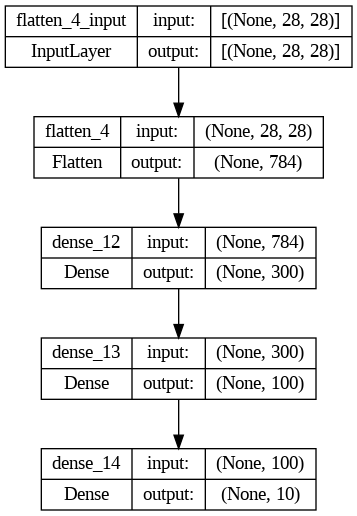

In [10]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                         keras.layers.Dense(300,activation="relu"),
                         keras.layers.Dense(100,activation="relu"),
                         keras.layers.Dense(10,activation="softmax")])
model.summary()
model.layers
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


Summary() method shows parameters as well. Parameters are the weights between two connected layers which is usually a multiplication between the number of neurons in each layer + the bias terms